### Stack

In [17]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.model_selection import LeaveOneOut
from sklearn import svm

%matplotlib inline 


In [18]:
cell_df = pd.read_csv("clevBinary.csv")
cell_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [19]:
feature_df = cell_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
X = np.asarray(feature_df)
X[0:5]

array([[ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   6. ],
       [ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ,   3. ,   3. ],
       [ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
          2.6,   2. ,   2. ,   7. ],
       [ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
          3.5,   3. ,   0. ,   3. ],
       [ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
          1.4,   1. ,   0. ,   3. ]])

In [20]:
cell_df['num'] = cell_df['num'].astype('int')
y = np.asarray(cell_df['num'])
y [0:5]

array([0, 1, 1, 0, 0])

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.94,  0.69, -2.24,  0.75, -0.28,  2.43,  1.01,  0.02, -0.7 ,
         1.07,  2.26, -0.72,  0.66],
       [ 1.38,  0.69,  0.87,  1.6 ,  0.74, -0.41,  1.01, -1.82,  1.44,
         0.38,  0.64,  2.48, -0.89],
       [ 1.38,  0.69,  0.87, -0.66, -0.35, -0.41,  1.01, -0.9 ,  1.44,
         1.33,  0.64,  1.41,  1.17],
       [-1.94,  0.69, -0.16, -0.1 ,  0.05, -0.41, -1.  ,  1.63, -0.7 ,
         2.1 ,  2.26, -0.72, -0.89],
       [-1.5 , -1.45, -1.2 , -0.1 , -0.84, -0.41,  1.01,  0.98, -0.7 ,
         0.3 , -0.98, -0.72, -0.89]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [23]:
# Create Base Learners
base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('rf_2', KNeighborsClassifier(n_neighbors=3)),
                 ('rf_3', svm.SVC(kernel='sigmoid'))
                ]


In [24]:

# Initialize Stacking Classifier with the Meta Learner

loo = LeaveOneOut()

clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=loo)



In [25]:
# Extract score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.88

In [26]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 0, 0])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75

Confusion matrix, without normalization
[[36  4]
 [ 5 30]]


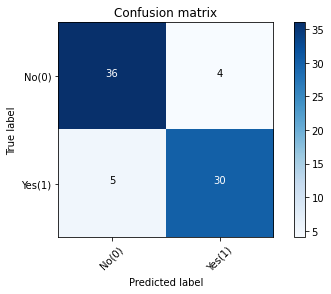

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'],normalize= False,  title='Confusion matrix')

In [30]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='binary', pos_label=1) 

0.8695652173913043

In [31]:
from sklearn import metrics
from sklearn.metrics import auc


fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat, pos_label=1)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve of Stacked')

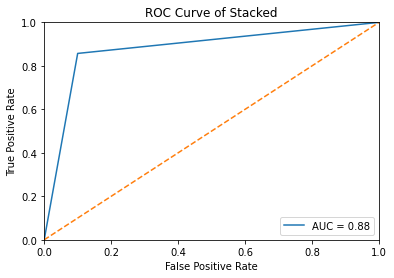

In [32]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Stacked')

## I used approaches like: CV, ool and without those but results were the same

In [33]:
yhat_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve of Stacked')

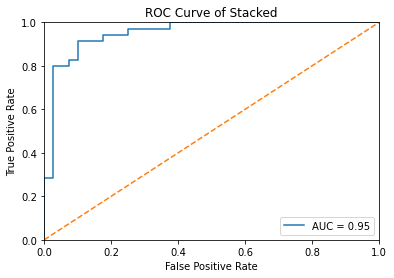

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Stacked')

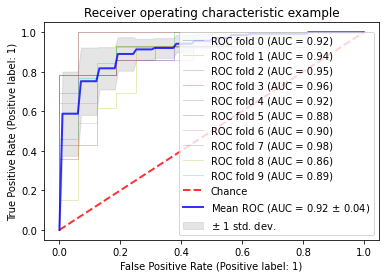

In [35]:
import matplotlib.pyplot as plt


from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = clf
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [48]:
import matplotlib.pyplot as plot
import numpy as num
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
#heart = X
data = X
target = y
classnames = ['No(0)','Yes(1)']
classnames
labels, counts = num.unique(target, return_counts=True)
print(data)
def evaluate_model(data_x, data_y):
    k_fold = KFold(10, shuffle=True, random_state=1)

    predicted_targets = num.array([])
    actual_targets = num.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        classifiers = clf.fit(train_x, train_y)
        predicted_labels = classifiers.predict(test_x)

        predicted_targets = num.append(predicted_targets, predicted_labels)
        actual_targets = num.append(actual_targets, test_y)

    return predicted_targets, actual_targets
  

[[ 0.94  0.69 -2.24 ...  2.26 -0.72  0.66]
 [ 1.38  0.69  0.87 ...  0.64  2.48 -0.89]
 [ 1.38  0.69  0.87 ...  0.64  1.41  1.17]
 ...
 [ 1.49  0.69  0.87 ...  0.64  1.41  1.17]
 [ 0.27  0.69  0.87 ...  0.64  0.34  1.17]
 [ 0.27 -1.45 -1.2  ...  0.64  0.34 -0.89]]


Normalized confusion matrix


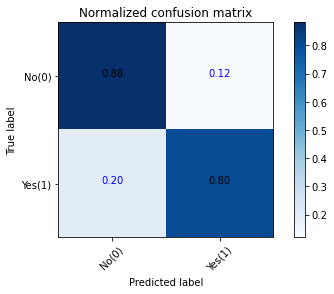

In [49]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list, labels=[0,1])
    num.set_printoptions(precision=2)

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'], normalize=True, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="black" if cnf_matrix[i, j] > thresh else "blue")

    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

    return cnf_matrix
predicted_target, actual_target = evaluate_model(data, target)
plot_confusion_matrix(predicted_target, actual_target)

Confusion matrix, without normalization


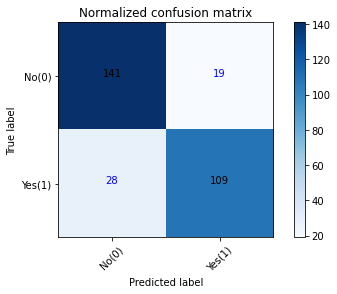

In [50]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list, labels=[0,1])
    num.set_printoptions(precision=2)
    print (classification_report(actual_targets, predicted_targets))

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'], normalize=False, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="black" if cnf_matrix[i, j] > thresh else "blue")

    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

    return cnf_matrix
predicted_target, actual_target = evaluate_model(data, target)
plot_confusion_matrix(predicted_target, actual_target)

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       160
         1.0       0.85      0.80      0.82       137

    accuracy                           0.84       297
   macro avg       0.84      0.84      0.84       297
weighted avg       0.84      0.84      0.84       297

Confusion matrix, without normalization


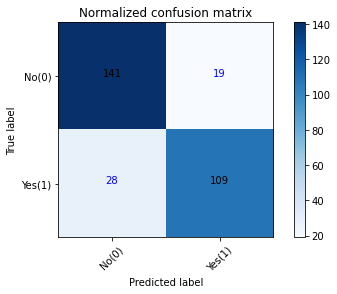

In [52]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list, labels=[0,1])
    num.set_printoptions(precision=2)
    print (classification_report(actual_target, predicted_target))

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'], normalize=False, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = np.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="black" if cnf_matrix[i, j] > thresh else "blue")

    plot.tight_layout()
    plot.ylabel('True label')
    plot.xlabel('Predicted label')

    return cnf_matrix
predicted_target, actual_target = evaluate_model(data, target)
plot_confusion_matrix(predicted_target, actual_target)